<a href="https://colab.research.google.com/github/imaginaryBuddy/imdbMoviesDSAI/blob/main/EDA_on_mid_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Univariate EDA 

In [ ]:
# importing libraries 
import numpy as np
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import plotly.express as px

sb.set() 

In [ ]:
url = 'https://raw.githubusercontent.com/imaginaryBuddy/tripleH/main/imdbTrain.csv'
imdb = pd.read_csv(url)
imdb.head()

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,4078,Color,David Raynr,16.0,94.0,9.0,200.0,Deon Richmond,927.0,9016377.0,...,8.0,English,USA,R,NaN,1999.0,209.0,5.2,1.85,143
1,2150,Color,Colin Higgins,11.0,114.0,19.0,842.0,Barry Corbin,1000.0,69700000.0,...,48.0,English,USA,R,35000000.0,1982.0,883.0,5.8,2.35,0
2,4790,Color,Eric England,15.0,81.0,15.0,93.0,Ace Marrero,847.0,NaN,...,6.0,English,USA,NaN,NaN,2013.0,94.0,4.1,16.00,61
3,4841,Color,Babar Ahmed,8.0,90.0,0.0,32.0,Alexander Wraith,502.0,NaN,...,18.0,English,USA,PG-13,350000.0,2009.0,119.0,3.2,NaN,53
4,4823,Color,Paul Fierlinger,51.0,83.0,3.0,258.0,Peter Gerety,812.0,246574.0,...,15.0,English,USA,NaN,NaN,2009.0,277.0,6.9,1.85,675


##num_voted_users
->Number of people who voted for the movie


In [ ]:
numVoted= pd.DataFrame(imdb["num_voted_users"])
numVoted.head()

,num_voted_users
0,1004
1,7748
2,268
3,476
4,1272


In [ ]:
print ("Data type : ", type(numVoted))
print ("Data dims : ", numVoted.size)
print()
numVoted.info()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  3933

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   num_voted_users  3933 non-null   int64
dtypes: int64(1)
memory usage: 30.9 KB


In [ ]:
numVoted.describe()

,num_voted_users
count,3.933000e+03
mean,8.356492e+04
std,1.421375e+05
min,5.000000e+00
25%,8.369000e+03
50%,3.304200e+04
75%,9.413900e+04
max,1.689764e+06


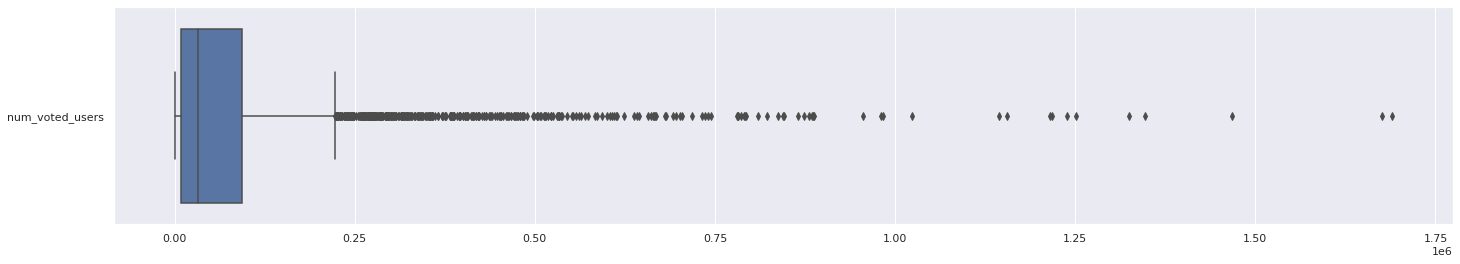

In [ ]:
f , axes = plt.subplots(figsize = (24,4))
sb.boxplot(data = numVoted, orient = 'h')
#many outliers

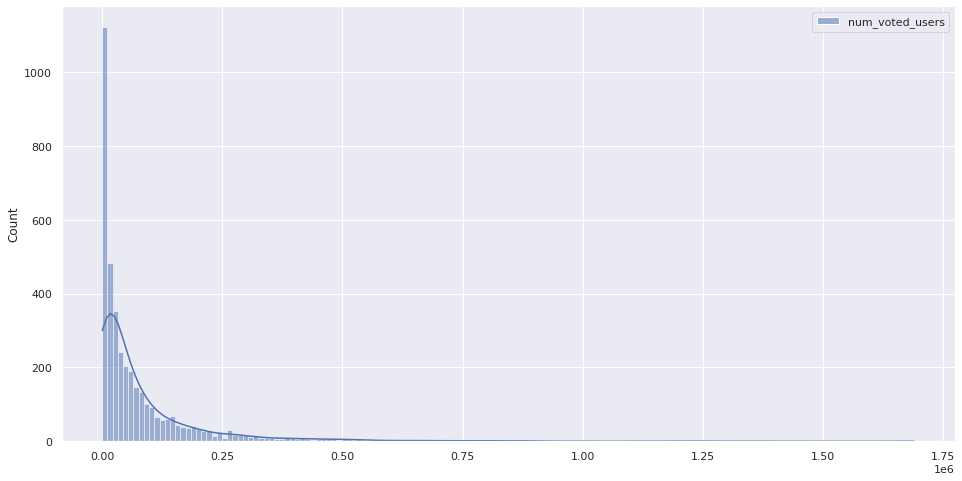

In [ ]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = numVoted,kde= True )

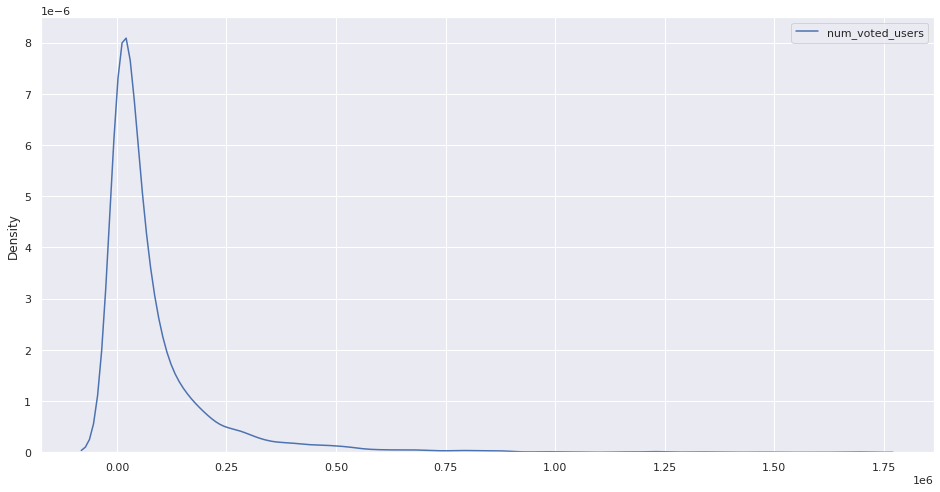

In [ ]:
f = plt.figure(figsize=(16, 8))
sb.kdeplot(data = numVoted)

In [ ]:
print ("skewness : ", numVoted.skew())


skewness :  num_voted_users    4.154227
dtype: float64


In [ ]:
#lets try to remove the outliers
Q1=(numVoted["num_voted_users"]).quantile(0.25)  #
Q3=(numVoted['num_voted_users']).quantile(0.75)
IQR=Q3-Q1



lowlimit=(Q1 - 1.5 * IQR)
uplimit= (Q3 + 1.5 * IQR)

print("Number of outliers is: ", len(numVoted[(numVoted['num_voted_users']>uplimit) | (numVoted[ 'num_voted_users']<lowlimit)]))
numVotedclean= numVoted.loc[(numVoted['num_voted_users']<uplimit) & (numVoted['num_voted_users']>lowlimit)]

Number of outliers is:  372


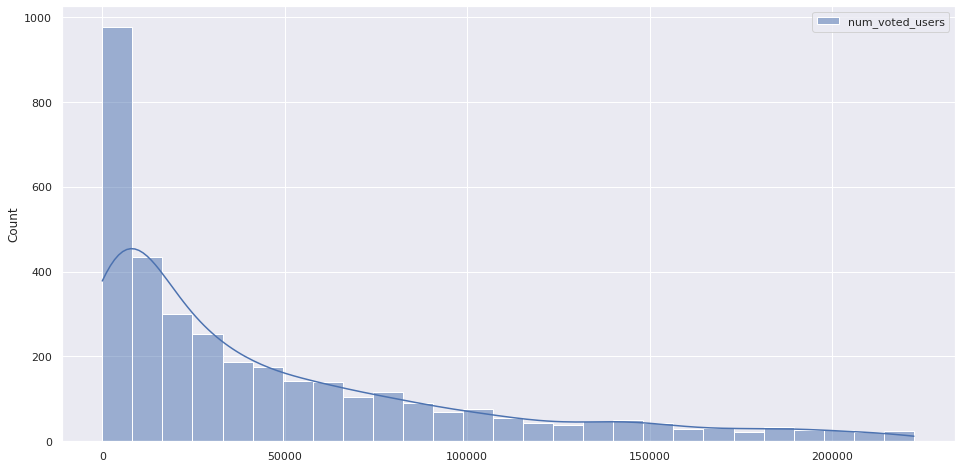

In [ ]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = numVotedclean,kde= True )

In [ ]:
print ("skewness after remove: ", numVotedclean.skew())

skewness after remove:  num_voted_users    1.397575
dtype: float64


TOTAL CAST LIKES

In [ ]:
castLikes= pd.DataFrame(imdb["cast_total_facebook_likes"])
castLikes.head()

,cast_total_facebook_likes
0,1936
1,3688
2,1151
3,689
4,1370


In [ ]:
print ("Data type : ", type(castLikes))
print ("Data dims : ", castLikes.size)
print()
castLikes.info()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  3933

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   cast_total_facebook_likes  3933 non-null   int64
dtypes: int64(1)
memory usage: 30.9 KB


In [ ]:
castLikes.describe()

,cast_total_facebook_likes
count,3933.000000
mean,9597.851004
std,18880.352860
min,0.000000
25%,1395.000000
50%,3086.000000
75%,13631.000000
max,656730.000000


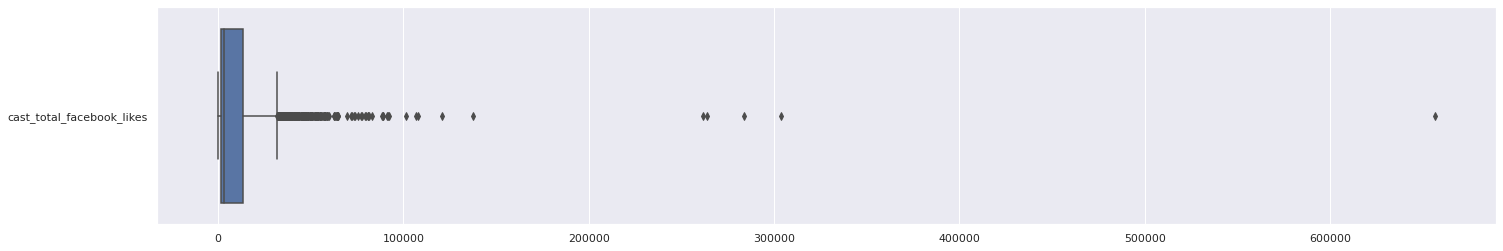

In [ ]:
f , axes = plt.subplots(figsize = (24,4))
sb.boxplot(data = castLikes, orient = 'h')
#many outliers

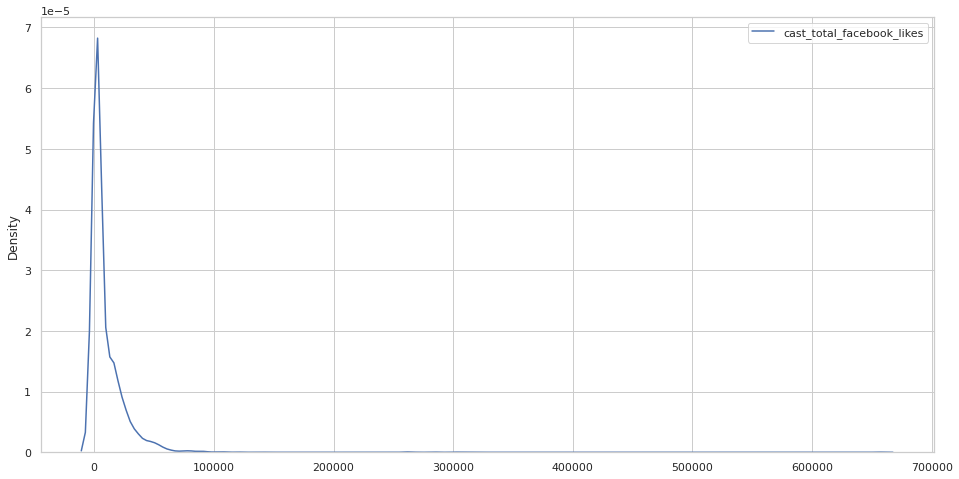

In [ ]:
f = plt.figure(figsize=(16,8))
sb.set_style("whitegrid")
sb.kdeplot(data = castLikes)

In [ ]:
print ("skewness : ", castLikes.skew())

skewness :  cast_total_facebook_likes    14.142361
dtype: float64


In [ ]:
# removing outliers
Q1=(castLikes["cast_total_facebook_likes"]).quantile(0.25)  #
Q3=(castLikes['cast_total_facebook_likes']).quantile(0.75)
IQR=Q3-Q1



lowlimit=(Q1 - 1.5 * IQR)
uplimit= (Q3 + 1.5 * IQR)

print("Number of outliers is: ", len(castLikes[(castLikes['cast_total_facebook_likes']>uplimit) | (castLikes['cast_total_facebook_likes']<lowlimit)]))
castLikesclean= castLikes.loc[(castLikes['cast_total_facebook_likes']<uplimit) & (castLikes['cast_total_facebook_likes']>lowlimit)]

Number of outliers is:  263


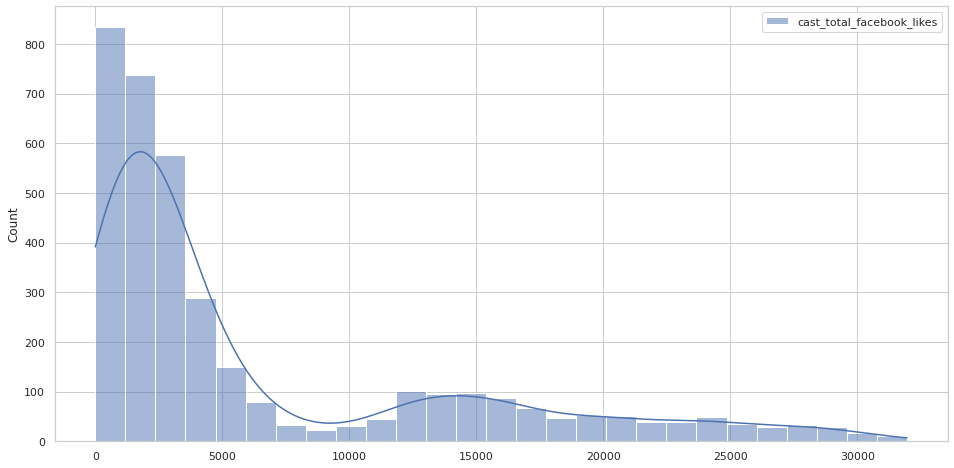

In [ ]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = castLikesclean,kde= True )

In [ ]:
print ("skewness after remove: ", castLikesclean.skew())

skewness after remove:  cast_total_facebook_likes    1.442926
dtype: float64


##facenumber_in_poster
->Number of the actor who featured in the movie poster

In [ ]:
faceNum= pd.DataFrame(imdb["facenumber_in_poster"])
faceNum.head()

,facenumber_in_poster
0,3.0
1,2.0
2,0.0
3,0.0
4,0.0


In [ ]:
print ("Data type : ", type(faceNum))
print ("Data dims : ", faceNum.size)
print()
faceNum.info()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  3933

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   facenumber_in_poster  3922 non-null   float64
dtypes: float64(1)
memory usage: 30.9 KB


In [ ]:
faceNumclean=faceNum.dropna()

In [ ]:
faceNum.describe()

,facenumber_in_poster
count,3922.000000
mean,1.380418
std,2.052512
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,43.000000


In [ ]:
faceNumclean.shape

(3922, 1)

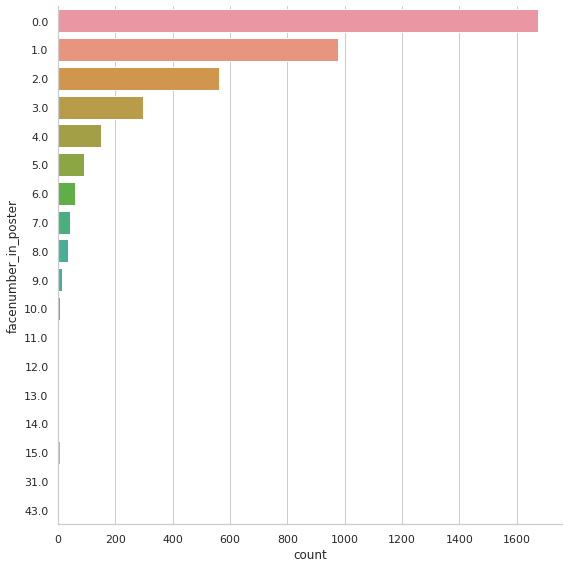

In [ ]:
sb.catplot(y = "facenumber_in_poster", data = faceNumclean, kind = "count", height = 8)
#most posters dont have actors face

## plot keywords

In [ ]:
keywords= pd.DataFrame(imdb['plot_keywords'])

In [ ]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   plot_keywords  3806 non-null   object
dtypes: object(1)
memory usage: 30.9+ KB


In [ ]:
keywordsclean=keywords.dropna()

In [ ]:
keywordsclean.head()

,plot_keywords
0,apostrophe in title|bare breasts|female nudity...
1,chicken|governor|locker room|sheriff|texas
2,dog|gun|hostage|husband wife relationship|jeal...
3,assassin|female assassin|kingdom|martial arts|...
4,autobiography|dog movie|german shepherd|memoir...


In [ ]:
from collections import Counter
plotkeys = Counter()

for ind, strKey in keywordsclean.iterrows() :
  wds = strKey["plot_keywords"].split("|")
  for w in wds :
    if w in plotkeys:
      plotkeys[w] = plotkeys[w] + 1
    else:
      plotkeys[w] = 1

plotkeys = pd.DataFrame.from_dict(plotkeys, orient = "index").reset_index()\
          .rename(columns = {"index": "key", 0 :"count"})
plotkeys.head()

,key,count
0,apostrophe in title,7
1,bare breasts,11
2,female nudity,39
3,nude black woman,1
4,prom,10


In [ ]:
plotkeys = Counter()

i = 0
for strKey in imdb["plot_keywords"] :
  wds = str(strKey).split("|")
  for w in wds :
    if i < 10:
      print(w)
    if w in plotkeys:
      plotkeys[w] = plotkeys[w] + 1
    else:
      plotkeys[w] = 1
  i+=1

display(plotkeys)


apostrophe in title
bare breasts
female nudity
nude black woman
prom
chicken
governor
locker room
sheriff
texas
dog
gun
hostage
husband wife relationship
jealousy
assassin
female assassin
kingdom
martial arts
mission
autobiography
dog movie
german shepherd
memoir
old man
class differences
letter
nursing home
second chance
summer love
aviator
based on book
girl
little girl
the little prince
centennial
girl
next door neighbor
prom
school
halloween
hospital
michael myers
rampage
vomiting
king
magic
one word title
pirate
village


Counter({'apostrophe in title': 7,
         'bare breasts': 11,
         'female nudity': 39,
         'nude black woman': 1,
         'prom': 10,
         'chicken': 4,
         'governor': 5,
         'locker room': 1,
         'sheriff': 27,
         'texas': 34,
         'dog': 43,
         'gun': 14,
         'hostage': 19,
         'husband wife relationship': 10,
         'jealousy': 7,
         'assassin': 32,
         'female assassin': 2,
         'kingdom': 3,
         'martial arts': 21,
         'mission': 21,
         'autobiography': 1,
         'dog movie': 4,
         'german shepherd': 3,
         'memoir': 2,
         'old man': 2,
         'class differences': 3,
         'letter': 18,
         'nursing home': 4,
         'second chance': 1,
         'summer love': 1,
         'aviator': 1,
         'based on book': 4,
         'girl': 35,
         'little girl': 4,
         'the little prince': 1,
         'centennial': 1,
         'next door neighbor': 2,
        

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from PIL import Image
import matplotlib.pyplot as plt

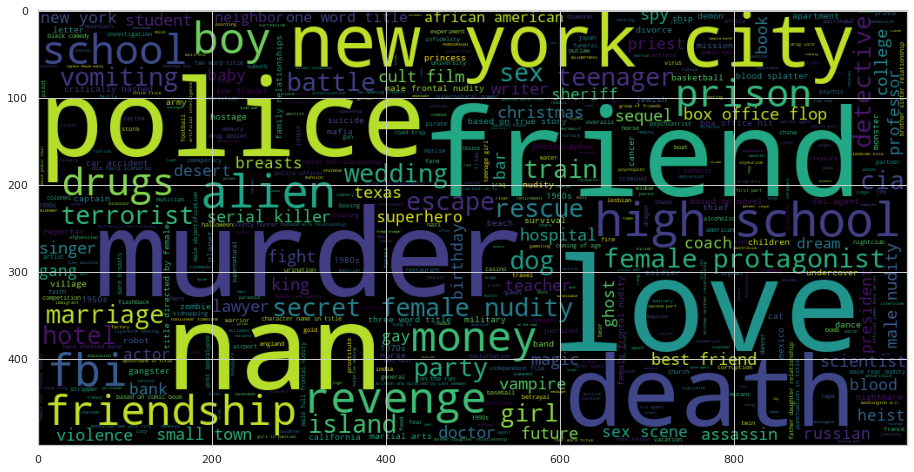

In [ ]:
myData=dict(plotkeys)
wordcloud = WordCloud(width = 1000, height = 500,max_words=500, max_font_size= 150).generate_from_frequencies(plotkeys)
 
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)

Is there correlation between num of votes and 

IS THERE CORRELATION BETWEEN NUM OF VOTES AND IMDB RATING?

In [ ]:
numCritic=pd.DataFrame(imdb['num_critic_for_reviews'])

In [ ]:
imdb_score=pd.DataFrame(imdb['imdb_score'])

In [ ]:
criticsVsImdb=pd.concat([numCritic, imdb_score], join="outer",axis=1)
criticsVsImdb.head()

,num_critic_for_reviews,imdb_score
0,16.0,5.2
1,11.0,5.8
2,15.0,4.1
3,8.0,3.2
4,51.0,6.9


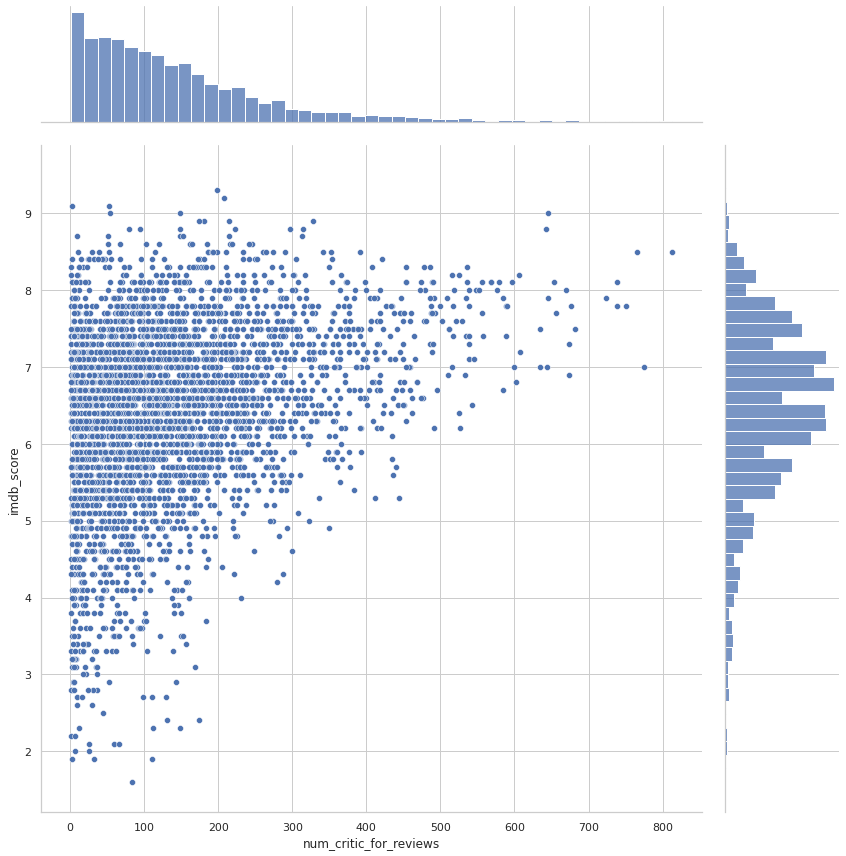

In [ ]:
sb.jointplot(data=criticsVsImdb,x="num_critic_for_reviews", y="imdb_score", height =12)

In [ ]:
criticsVsImdb.corr()

,num_critic_for_reviews,imdb_score
num_critic_for_reviews,1.000000,0.314468
imdb_score,0.314468,1.000000


In [ ]:
votesVsImdb=pd.concat([numVoted, imdb_score], join="outer",axis=1)
votesVsImdb.head()

In [ ]:
votesVsImdb.info()


In [ ]:
imdb_score.describe()

In [ ]:
sb.jointplot(data=votesVsImdb,x="num_voted_users", y="imdb_score", height =12)

In [ ]:
votesVsImdb.corr()

In [ ]:
votesVsImdb2=pd.concat([numVotedclean, imdb_score], join="outer",axis=1)
votesVsImdb2.head()

In [ ]:
votesVsImdb2.corr()
#correlation became worse after removing outlier

IS THERE CORRELATION BETWEEN NUMBER OF CAST LIKES AND IMDB SCORE?

In [ ]:
castLikesVsImdb=pd.concat([castLikes, imdb_score], join="outer",axis=1)
castLikesVsImdb.head()

In [ ]:
castLikesVsImdb.info()

In [ ]:
sb.jointplot(data=castLikesVsImdb,x="cast_total_facebook_likes", y="imdb_score", height =12)

In [ ]:
castLikesVsImdb.corr()
#bad correlation

In [ ]:
#lets try the correlation between cast likes with removed outlier and imdb score
castLikesVsImdb2=pd.concat([castLikesclean, imdb_score], join="outer",axis=1)
castLikesVsImdb2.corr()

In [ ]:
#only slight improvement

In [ ]:
votesVscastLikes=pd.concat([numVoted, castLikesclean], join="outer",axis=1)

In [ ]:
votesVscastLikes.info()

In [ ]:
votesVscastLikesclean=votesVscastLikes.dropna()

In [ ]:
sb.jointplot(data=votesVscastLikesclean,x="cast_total_facebook_likes", y="num_voted_users", height =12)

In [ ]:
votesVscastLikesclean.corr()

## 3D Scatter plot for data with imdb rating above average

In [ ]:
avgRating = 6.6
highRating= imdb[imdb["imdb_score"]>= avgRating]

In [ ]:
fig= px.scatter_3d(highRating, x="imdb_score", y="genres", z="budget", color = "imdb_score", size_max= 50)
fig.show()

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
url = "http://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/"

r = requests.get(url)
data = r.text
soup = BeautifulSoup(data, 'html.parser')

table = soup.find('table')
rows = table.tbody.findAll('tr');

years = []
cpis = []

for row in rows:
    year = row.findAll('td')[0].get_text()
    if year.isdigit() and int(year) < 2021:
        years.append(int(year))
        cpis.append(float(row.findAll('td')[13].get_text()))

cpi_table = pd.DataFrame({
    "year": years,
    "avg_annual_cpi": cpis
})

cpi_table.head()

In [ ]:
def get_real_value(nominal_amt, old_cpi, new_cpi):
    real_value = (nominal_amt * new_cpi) / old_cpi
    return real_value

## Machine Learning

### Uni variate Linear regression


cast_total_facebook_likes vs imdb_score

num_voted_users vs imdb_score

movie_facebook_likes vs imdb score

duration vs imdb_score

budget vs imdb_score

cast_total_facebook_likes vs imdb_score

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
imdb_score = pd.DataFrame(imdb['imdb_score'])  # Response
castfblikes = pd.DataFrame(imdb['cast_total_facebook_likes']) #predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(castfblikes, imdb_score, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict imdb_score corresponding to castfblikes
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()


# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred, color = "r")
plt.show()